In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [47]:
data = pd.read_csv("DOGE-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [48]:
data.info


<bound method DataFrame.info of             Date      Open      High       Low     Close  Adj Close  \
0     2017-11-09  0.001207  0.001415  0.001181  0.001415   0.001415   
1     2017-11-10  0.001421  0.001431  0.001125  0.001163   0.001163   
2     2017-11-11  0.001146  0.001257  0.001141  0.001201   0.001201   
3     2017-11-12  0.001189  0.001210  0.001002  0.001038   0.001038   
4     2017-11-13  0.001046  0.001212  0.001019  0.001211   0.001211   
...          ...       ...       ...       ...       ...        ...   
1756  2022-08-31  0.061534  0.063333  0.061058  0.061330   0.061330   
1757  2022-09-01  0.061336  0.062479  0.060194  0.062372   0.062372   
1758  2022-09-02  0.062372  0.062712  0.060947  0.061635   0.061635   
1759  2022-09-03       NaN       NaN       NaN       NaN        NaN   
1760  2022-09-04  0.062682  0.062744  0.062667  0.062696   0.062696   

           Volume  
0       6259550.0  
1       4246520.0  
2       2231080.0  
3       3288960.0  
4       2481270

In [49]:
data.shape

(1761, 7)

In [50]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [51]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [52]:
data.corr(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [53]:
data.duplicated().sum()

0

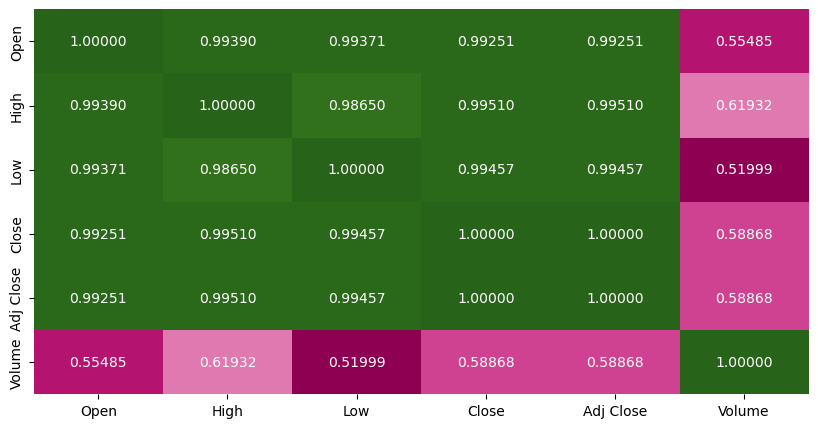

In [54]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(numeric_only=True),fmt='.5f',annot=True,cbar=False,cmap='PiYG')
plt.show()

In [55]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [56]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [57]:
data = data.dropna()

In [58]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1760.0,5.957455e-02,1.013254e-01,1.046000e-03,2.549500e-03,3.476500e-03,7.063300e-02,6.878010e-01
High,1760.0,6.309565e-02,1.091517e-01,1.210000e-03,2.616000e-03,3.603500e-03,7.503525e-02,7.375670e-01
Low,1760.0,5.612606e-02,9.369549e-02,1.002000e-03,2.499750e-03,3.356000e-03,6.847775e-02,6.081680e-01
Close,1760.0,5.961943e-02,1.013787e-01,1.038000e-03,2.547750e-03,3.494500e-03,7.065750e-02,6.847770e-01
Adj Close,1760.0,5.961943e-02,1.013787e-01,1.038000e-03,2.547750e-03,3.494500e-03,7.065750e-02,6.847770e-01
Volume,1760.0,1.016258e+09,3.563999e+09,1.431720e+06,2.307671e+07,8.981855e+07,6.565853e+08,6.941068e+10


Text(0.5, 1.0, 'Date vs Close of 2021')

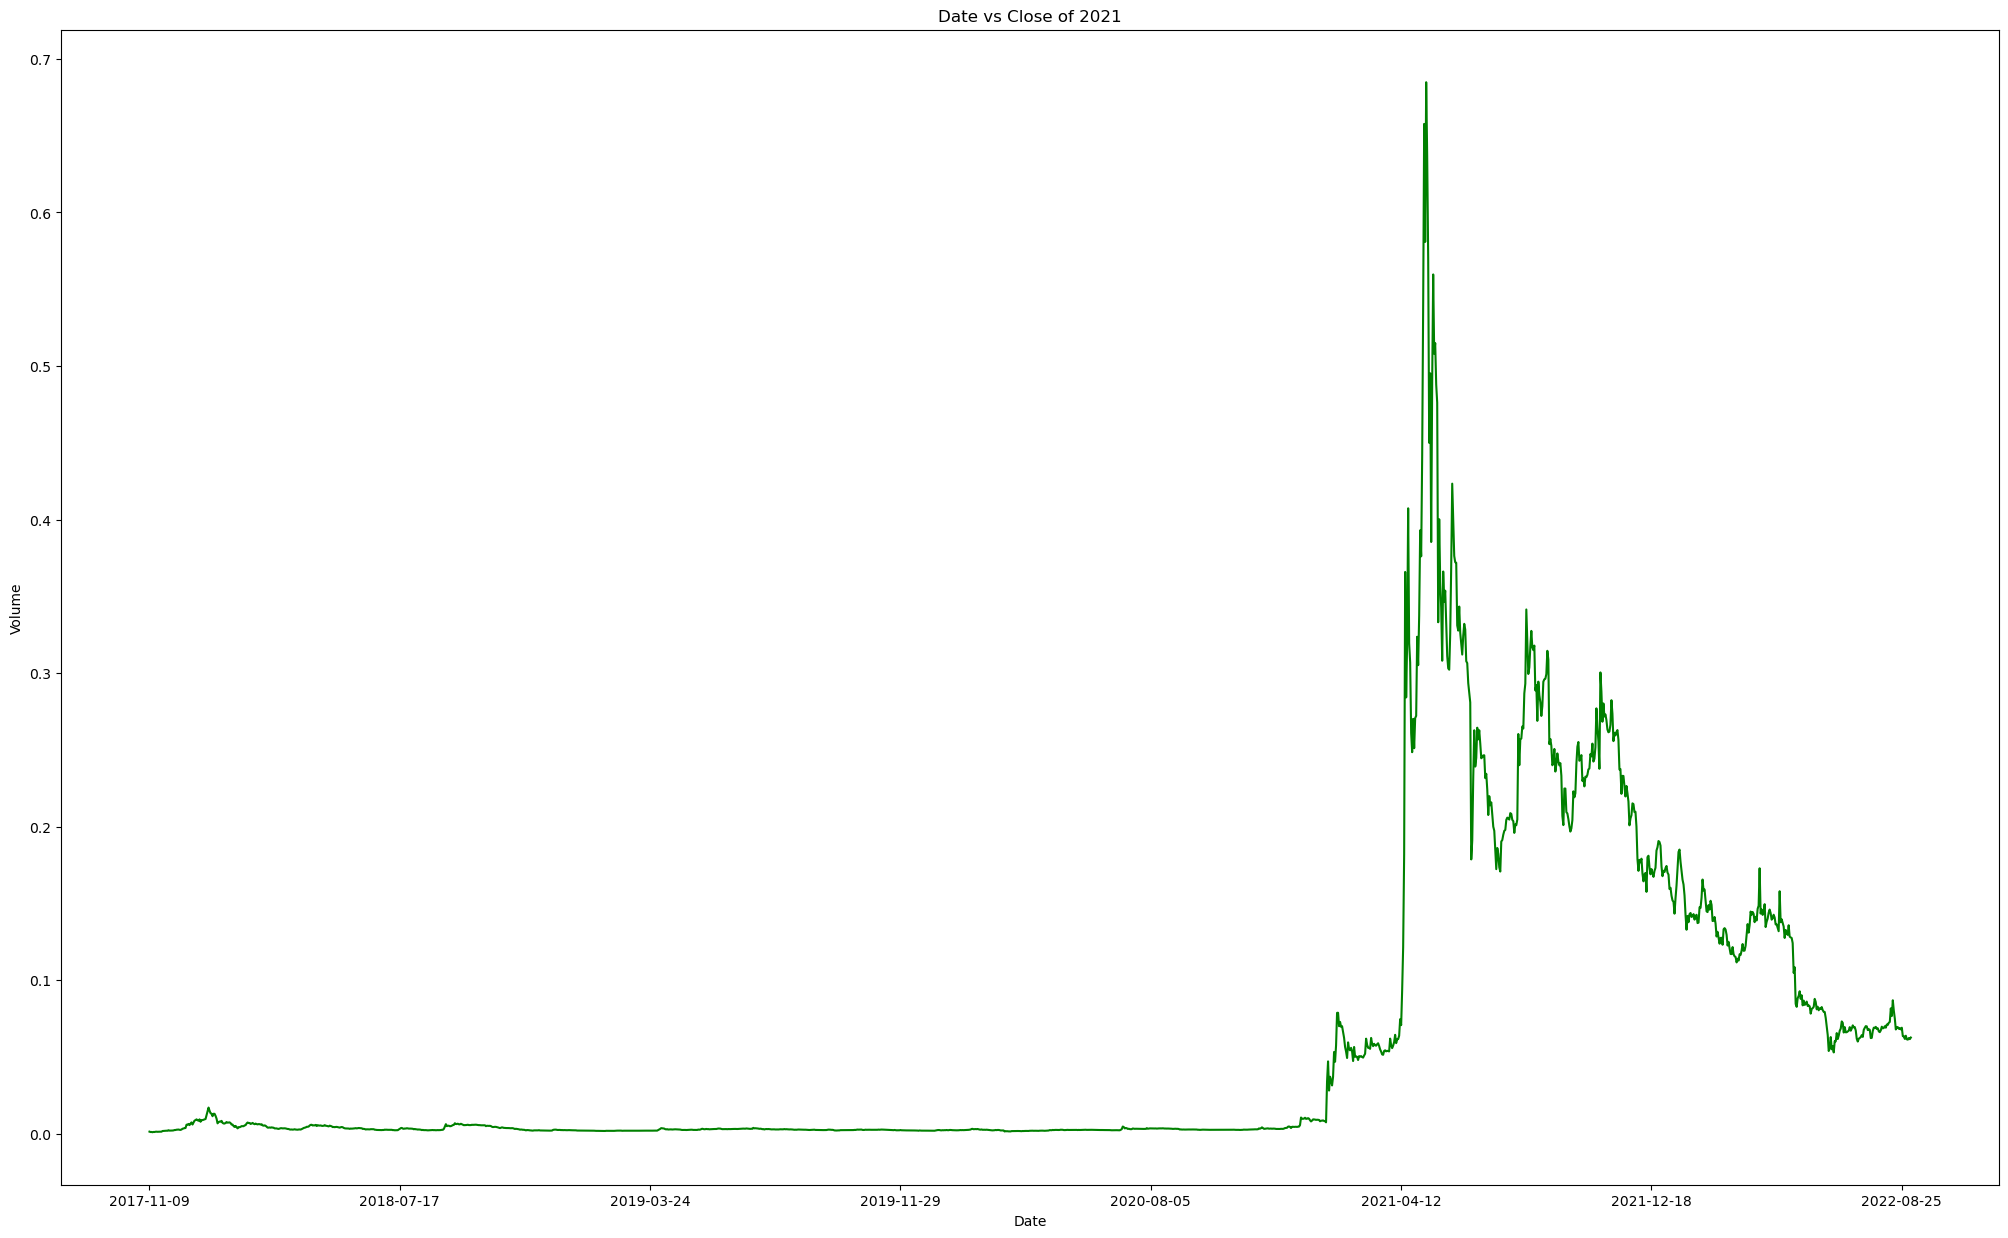

In [59]:
plt.figure(figsize=(25, 15))
x = data.groupby('Date')['Close'].mean()
x.plot(linewidth=1.5, color='g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

In [60]:
'''data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
data["y"] = data["High"] / data["Volume"]
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
'''
abs(data.corr()["Close"].sort_values(ascending=False))

ValueError: could not convert string to float: '2017-11-09'

In [ ]:
df = data[["Open", "High", "Low", "Volume",'Close']]
df.head()

In [61]:
df.shape

(1760, 5)

In [62]:
df.columns

Index(['Open', 'High', 'Low', 'Volume', 'Close'], dtype='object')

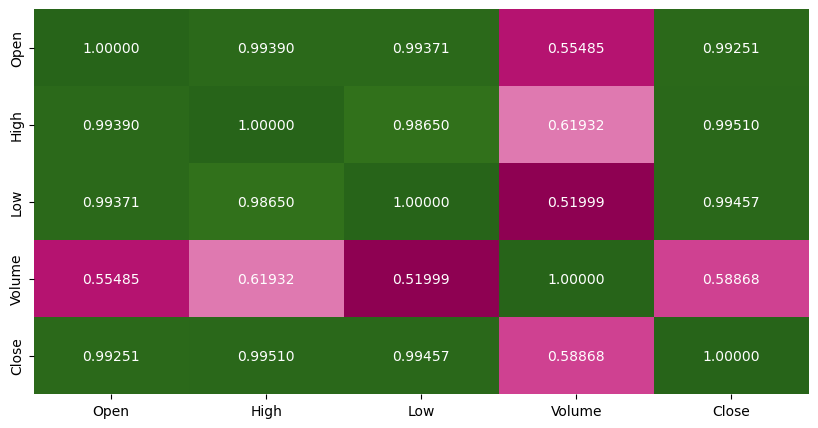

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),fmt='.5f',annot=True,cbar=False,cmap='PiYG')
plt.show()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x=df[['Open','High','Low','Volume']]
y=df[['Close']]

In [66]:
x,y

(          Open      High       Low       Volume
 0     0.001207  0.001415  0.001181    6259550.0
 1     0.001421  0.001431  0.001125    4246520.0
 2     0.001146  0.001257  0.001141    2231080.0
 3     0.001189  0.001210  0.001002    3288960.0
 4     0.001046  0.001212  0.001019    2481270.0
 ...        ...       ...       ...          ...
 1755  0.063899  0.064408  0.060550  328934727.0
 1756  0.061534  0.063333  0.061058  309748693.0
 1757  0.061336  0.062479  0.060194  328765413.0
 1758  0.062372  0.062712  0.060947  273453013.0
 1760  0.062682  0.062744  0.062667  297513408.0
 
 [1760 rows x 4 columns],
          Close
 0     0.001415
 1     0.001163
 2     0.001201
 3     0.001038
 4     0.001211
 ...        ...
 1755  0.061525
 1756  0.061330
 1757  0.062372
 1758  0.061635
 1760  0.062696
 
 [1760 rows x 1 columns])

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [68]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1320, 4), (440, 4), (1320, 1), (440, 1))

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(x_train, y_train.values.ravel())

y_pred = rf.predict(x_test)


In [70]:
y_pred_=rf.predict(x_train)

In [71]:

mae = mean_absolute_error(y_train, y_pred_)
mse = mean_squared_error(y_train, y_pred_)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_)


print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📈 Mean Squared Error (MSE): {mse:.4f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"🔢 R² Score: {r2:.4f}")


📉 Mean Absolute Error (MAE): 0.0007
📈 Mean Squared Error (MSE): 0.0000
📊 Root Mean Squared Error (RMSE): 0.0029
🔢 R² Score: 0.9992


In [72]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📈 Mean Squared Error (MSE): {mse:.4f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"🔢 R² Score: {r2:.4f}")


📉 Mean Absolute Error (MAE): 0.0021
📈 Mean Squared Error (MSE): 0.0001
📊 Root Mean Squared Error (RMSE): 0.0073
🔢 R² Score: 0.9947


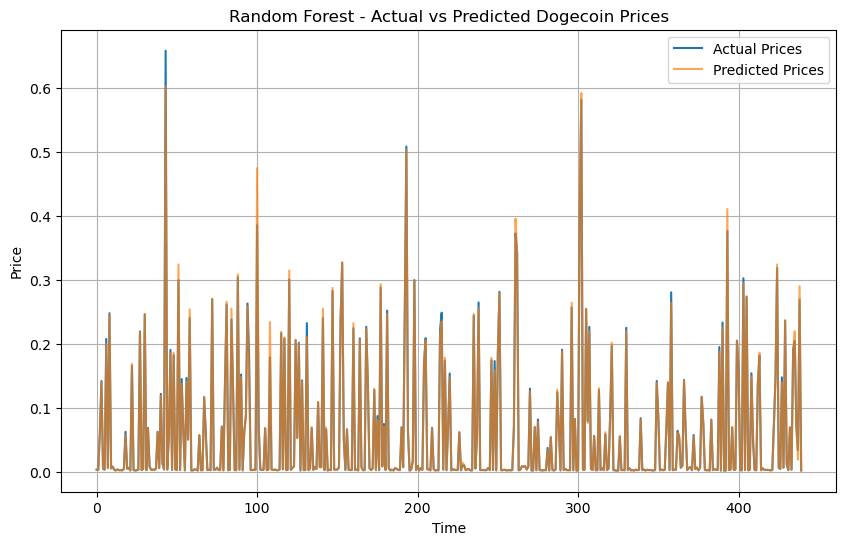

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', alpha=0.7)
plt.title("Random Forest - Actual vs Predicted Dogecoin Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


In [74]:
import joblib

# Train your model
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import StandardScaler
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train.values.ravel())

# Save it to a file
joblib.dump(model, 'dogecoin_model.pkl')


['dogecoin_model.pkl']